In [18]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import pickle
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import keras
import sys

In [67]:
filename = '/home/sxz/data/geolife_Data/Encoded_data.pickle'
with open(filename, 'rb') as f:
    a1,b1 = pickle.load(f)

In [68]:
Train_X = a1[:int(0.8*len(a1))]

In [69]:
Train_Y_ori = b1[:int(0.8*len(b1))]

In [70]:
Test_X = a1[int(0.8*len(a1)):]

In [71]:
Test_Y_ori = b1[int(0.8*len(b1)):]

In [72]:
len(Test_X) - len(Test_Y)

0

In [73]:
Test_Y = np.zeros((len(Test_Y_ori),5))

In [74]:
for i in range(len(Test_Y_ori)):
    Test_Y[i][Test_Y_ori[i]] = 1
print(Test_Y_ori)
print(len(Test_Y_ori))
print(Train_Y_ori)
print(len(Train_Y_ori))

[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [75]:
Train_Y = np.zeros((len(Train_Y_ori),5))

In [76]:
for i in range(len(Train_Y_ori)):
    Train_Y[i][Train_Y_ori[i]] = 1
print(Train_Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [77]:
with open('/home/sxz/data/geolife_Data/e_Cross1.pickle', 'wb') as f:
    pickle.dump([Train_X, Train_Y, Test_X, Test_Y, Test_Y_ori], f)

In [164]:
filename = '/home/sxz/data/geolife_Data/pseudo_data1.pickle'
with open(filename, 'rb') as f:
    Train_X, label_ ,encode = pickle.load(f)

In [165]:
encode[label_==0,0]

array([-0.00169511, -0.00120653, -0.00117257, -0.00134917, -0.0014697 ,
       -0.00137619, -0.00120322, -0.00110016, -0.00129467, -0.00151485,
       -0.00113319, -0.00132114, -0.00130715, -0.00104906, -0.00102654,
       -0.00138429, -0.0010833 , -0.00113092, -0.00104417, -0.00130347,
       -0.00142991, -0.000973  , -0.00121432, -0.0010196 , -0.00128101,
       -0.00149498, -0.00130898, -0.00100506, -0.00114816, -0.00088383,
       -0.00135537, -0.00127693, -0.00149354, -0.00092324, -0.00140403,
       -0.00120922, -0.00094373, -0.00151534, -0.00099113], dtype=float32)

In [166]:
encode = np.array(encode)

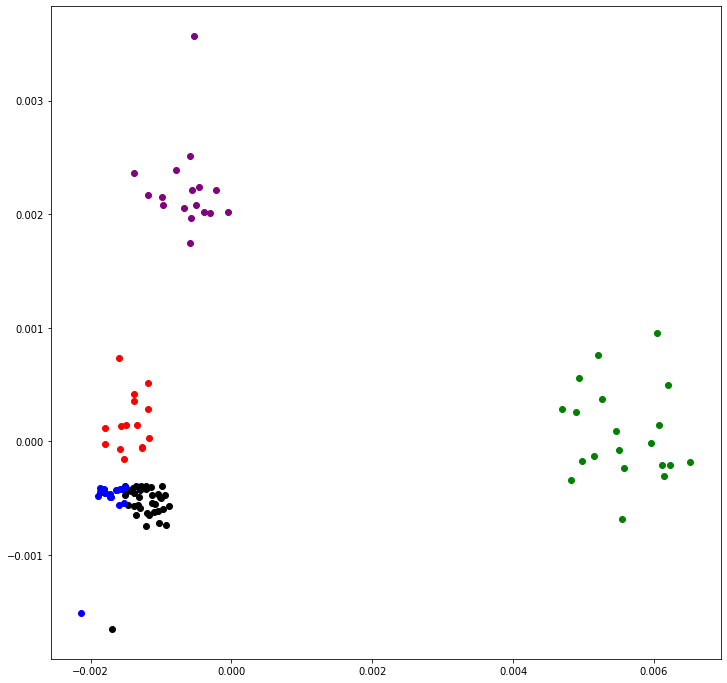

In [167]:
plt.figure(figsize=(12,12))
# print(unlabel_pca[label_==0,0])
plt.plot(encode[label_==0,0],encode[label_==0,1],'o',color='black')
plt.plot(encode[label_==1,0],encode[label_==1,1],'o',color='red')
plt.plot(encode[label_==2,0],encode[label_==2,1],'o',color='blue')
plt.plot(encode[label_==3,0],encode[label_==3,1],'o',color='purple')
plt.plot(encode[label_==4,0],encode[label_==4,1],'o',color='green')

In [163]:
encode[label==0]

array([], shape=(0, 110, 2), dtype=float32)

In [99]:
print(label_)

[0 1 2 3 4 4 2 0 3 1 1 3 4 3 0 0 2 1 2 4 1 0 1 1 0 0 0 4 4 2 3 2 1 4 0 1 4
 0 4 3 1 4 1 2 2 4 4 1 1 3 2 4 2 4 1 1 1 0 1 4 1 1 4 4 4 3 1 1 4 2 4 4 0 0
 1 1 1 1 4 3 4 2 1 0 1 4 3 1 0 4 4 4 4 4 4 0 1 1 4 0 1 2 4 3 4 4 0 4 0 3 4
 2 0 0 2 4 1 3 1 1 1 0 0 0 0 1 4 2 1 0 4 1 4 1 4 0 1 3 4 4 4 4 1 4 4 1 2 4
 3 2 2 4 1 1 3 3 4 4 4 4 1 1 4 3 1 1 1 4 1 1 4 4 3 0 0 1 1 0 0 4 4 4 3 1 1
 3 1 1 1 4 4 0 4 2 1 1 4 3 1 1 1 1 1 3 1 0 1 4 1 4 1 1 1 4 1 4 4 4 4 3 1 0
 1 4 4 4 4 0 3 1 0 1 0 1 0 1 4 1 4 4 1 1 4 4 4 3 4 3 4 1 4 1 1 1 0 1 0 1 1
 4 3 0 3 1 4 1 4 3 1 1 1 1 3 4 1 1 4 1 0 0 4 3 4 4 4 4 4 3 4 3 1 4 1 4 0 4
 2 2 3 4 4 2 4 3 4 3 1 4 0 2 0 4 3 4 2 3 0 4 1 4 3 2 1 4 2 1 4 1 4 4 4 1 4
 4 2 1 2 1 3 1 4 2 4 1 3 1 0 3 4 1 1 2 1 4 0 0 0 4 3 4 1 0 4 1 2 0 4 2 4 4
 2 1 0 4 1 1 3 1 4 2 1 0 2 4 1 3 1 0 1 4 1 2 1 0 4 2 4 1 4 4]


In [94]:
np.shape(label_)

(400,)

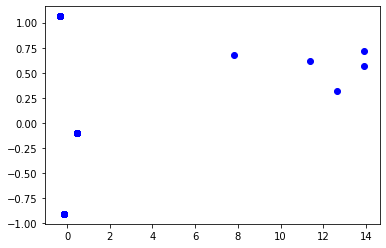

In [77]:
plt.plot(unlabel_pca[:,0],unlabel_pca[:,1],'o',color='blue')

In [78]:
label_ = label_[0]

In [79]:
pca = PCA(n_components = 2)
Train_X = Train_X.reshape(400,992)

In [80]:
unlabel_pca = pca.fit_transform(Train_X)
print(unlabel_pca)

[[11.37021995  0.61509987]
 [13.91841553  0.71494593]
 [12.62859954  0.31561091]
 [ 7.83568824  0.67945245]
 [13.92457328  0.57065851]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [ 0.45654943 -0.10180646]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [ 0.45654943 -0.10180646]
 [-0.14360963 -0.9076196 ]
 [ 0.45654943 -0.10180646]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [ 0.45654943 -0.10180646]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 

[11.37021995 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963]


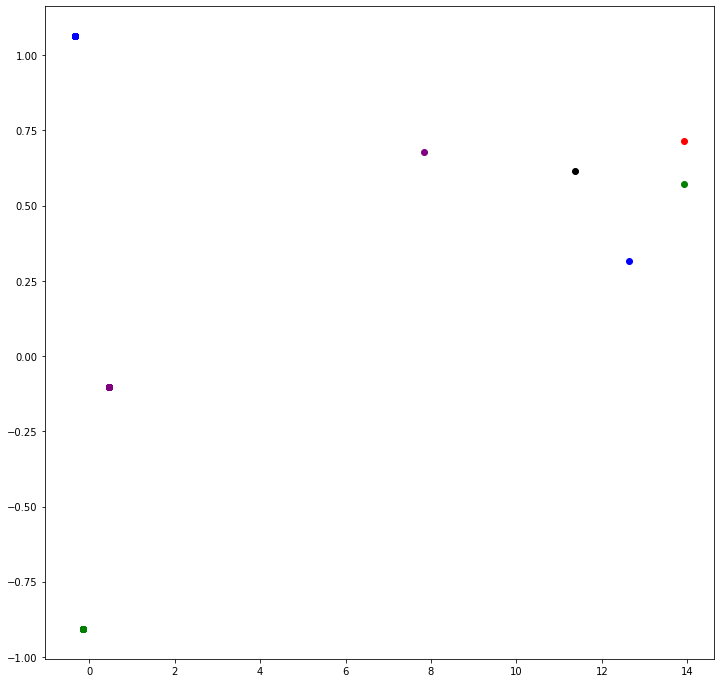

In [155]:
plt.figure(figsize=(12,12))
print(unlabel_pca[label_==0,0])
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')
plt.plot(unlabel_pca[label_==4,0],unlabel_pca[label_==4,1],'o',color='green')